# This example shows how to use the GFMM classifier using an original online learning algorithm

Note that the numerical features in training and testing datasets must be in the range of [0, 1] because the GFMM classifiers require features in the unit cube.

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\incremental_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the GFMM classifier using the original online learning algorithm

In [5]:
onln_gfmm_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/incremental_learner/onln_gfmm.py"))
onln_gfmm_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\incremental_learner\\onln_gfmm.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{onln_gfmm_file_path}" -h

usage: onln_gfmm.py [-h] -training_file TRAINING_FILE -testing_file
                    TESTING_FILE [--theta THETA] [--theta_min THETA_MIN]
                    [--gamma GAMMA] [--alpha ALPHA] [--is_draw IS_DRAW]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --theta THETA         Maximum hyperbox size (in the range of (0, 1])
                        (default: 0.5)
  --theta_min THETA_MIN
                        Mimimum value of the maximum hyperbox size to escape
                        the training loop (in the range of (0, 1]) (default:
                        0.5)
  --gamma GAMMA         A sensitivity parameter describing the speed of
                

#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

In [9]:
!python "{onln_gfmm_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --theta 0.1 --theta_min 0.1 --gamma 1

Number of hyperboxes = 53
Testing accuracy =  84.50%


## 2. Using the GFMM classifier with original online learning algorithm through its init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.incremental_learner.onln_gfmm import OnlineGFMM

In [11]:
import pandas as pd

#### Create training and testing data sets

In [12]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [13]:
theta = 0.1
theta_min = 0.1
gamma = 1
is_draw = True

### Training

<IPython.core.display.Javascript object>


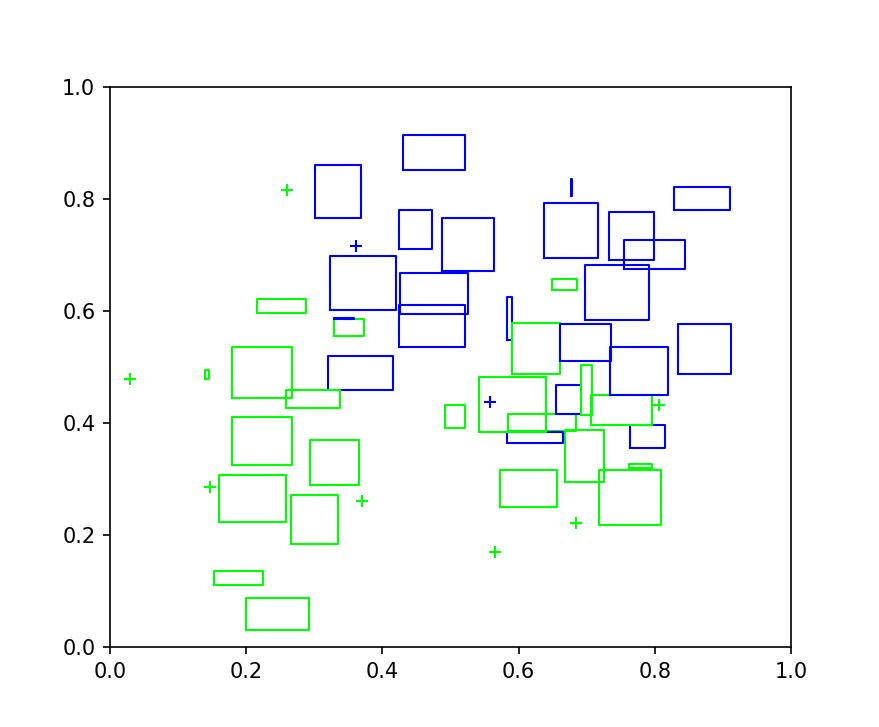

OnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1]),
           V=array([[0.42413   , 0.53516   ],
       [0.70577   , 0.397105  ],
       [0.82785   , 0.78025   ],
       [0.66038   , 0.51128   ],
       [0.48794   , 0.672     ],
       [0.26651   , 0.18424   ],
       [0.32289   , 0.60194   ],
       [0.19944   , 0.03      ],
       [0.29343   , 0.28975   ],
       [0.63683   , 0.6936    ],
       [0.32906   , 0.55512   ],
       [0.03      , 0.47757   ],
       [0.54...
       [0.815     , 0.397095  ],
       [0.67906   , 0.83605   ],
       [0.37033   , 0.26124   ],
       [0.52197   , 0.91371   ],
       [0.66037   , 0.57837   ],
       [0.52621   , 0.66846   ],
       [0.80583   , 0.43242   ],
       [0.79935   , 0.7757    ],
       [0.35813   , 0.58772   ],
       [0.79516   , 0.32629   ],
       [0.70743   , 0.50325   ],
       [0.36057  

In [14]:
onln_gfmm_clf = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)
onln_gfmm_clf.fit(Xtr, ytr)

#### The code below shows how to display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


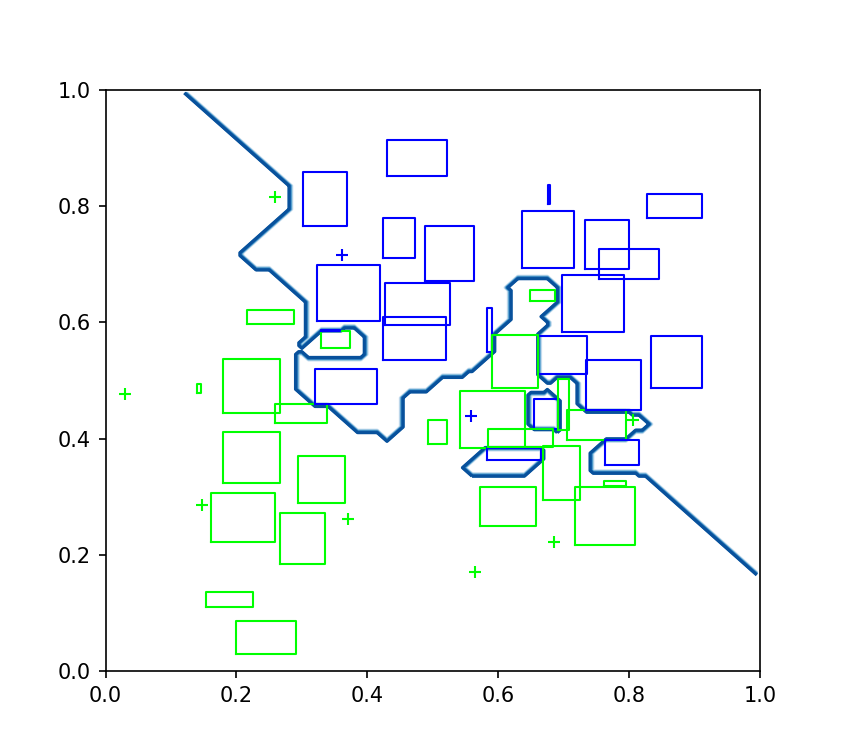

In [15]:
onln_gfmm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [16]:
print("Number of existing hyperboxes = %d"%(onln_gfmm_clf.get_n_hyperboxes()))

Number of existing hyperboxes = 53


### Prediction

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = onln_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  84.50%


### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class

In [19]:
sample_need_explain = 10
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = onln_gfmm_clf.get_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain])

In [20]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.571640, 0.233700] is 2 and real class is 2


In [21]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.870180
Class 2 has the maximum membership value = 0.984660
Class 1 has the representative hyperbox: V = [0.58339 0.36352] and W = [0.66562    0.38375437]
Class 2 has the representative hyperbox: V = [0.57285 0.24904] and W = [0.65695 0.31638]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


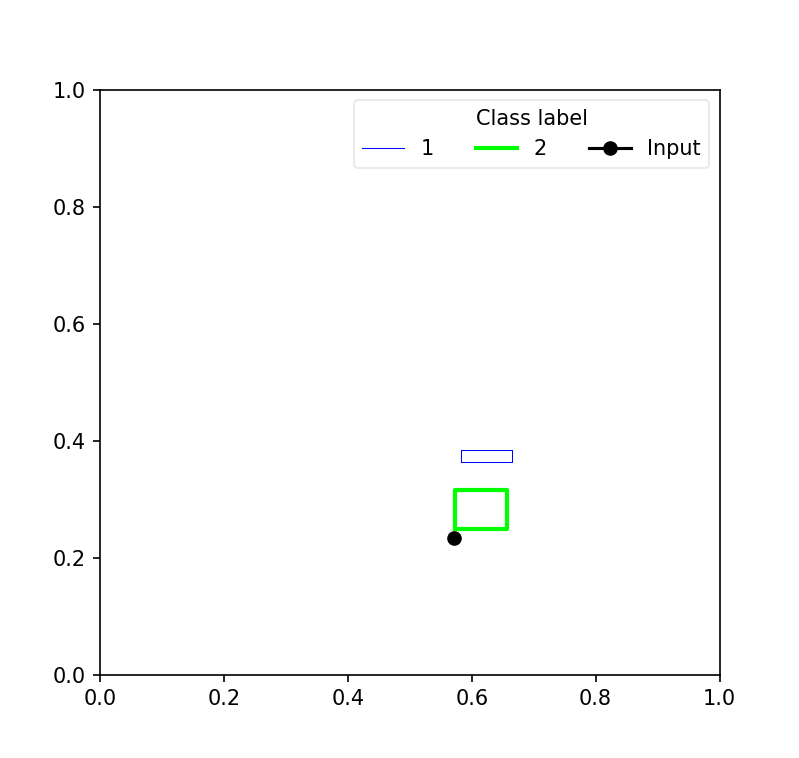

In [22]:
onln_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates. This mode best fits for any dimensions

In [23]:
# Create the parallel coordinates graph
onln_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, file_path="iframe_figures/onln_gfmm_par_cord_1.html")

In [24]:
# Load the result to show on the notebook
from IPython.display import IFrame
IFrame('iframe_figures/onln_gfmm_par_cord_1.html', width=820, height=500)

#### An example for the wrong prediction case with the demonstration

In [25]:
# Try another sample
sample_need_explain = 1
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = onln_gfmm_clf.get_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain])

In [26]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.485900, 0.476500] is 2 and real class is 1


In [27]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
print("Hyperboxes:")
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.941340
Class 2 has the maximum membership value = 0.955140
Hyperboxes:
Class 1 has the representative hyperbox: V = [0.42413 0.53516] and W = [0.52084 0.60972]
Class 2 has the representative hyperbox: V = [0.49255 0.39125] and W = [0.52124 0.43164]


<IPython.core.display.Javascript object>


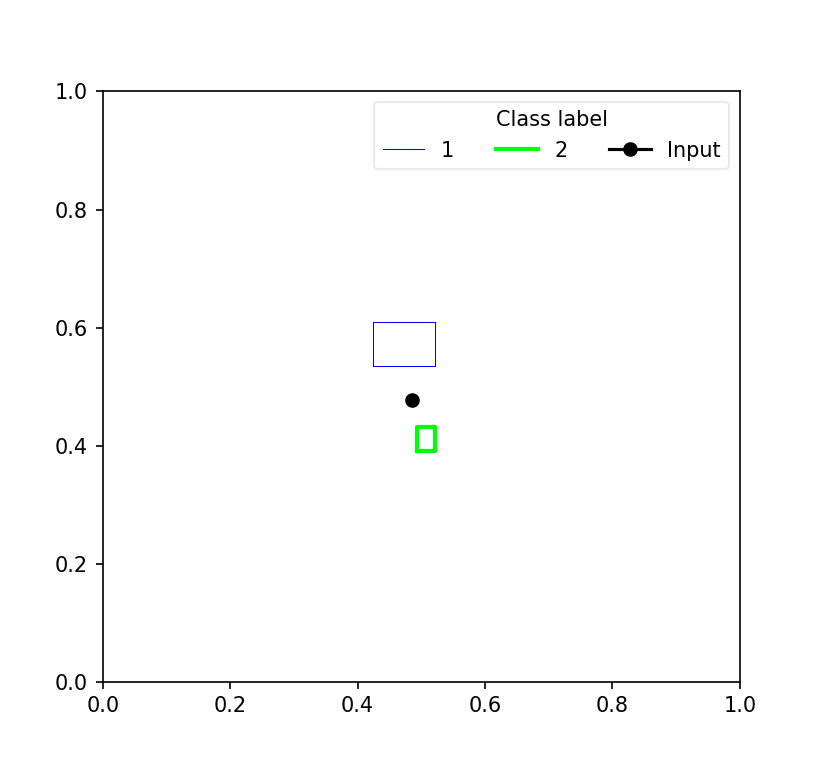

In [28]:
onln_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

In [29]:
# Create the parallel coordinates graph
onln_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, file_path="iframe_figures/onln_gfmm_par_cord_2.html")

In [30]:
# Load the result to show on the notebook
from IPython.display import IFrame
IFrame('iframe_figures/onln_gfmm_par_cord_2.html', width=820, height=500)